In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("C:\\Users\\Vikash Gupta\\AppData\\Local\\Temp\\3cf8492c-443d-473a-837e-c32de940b216_SpotifyFeatures.csv.zip.216\\SpotifyFeatures.csv")

# Select useful audio features
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo']

data = df[features].dropna()

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


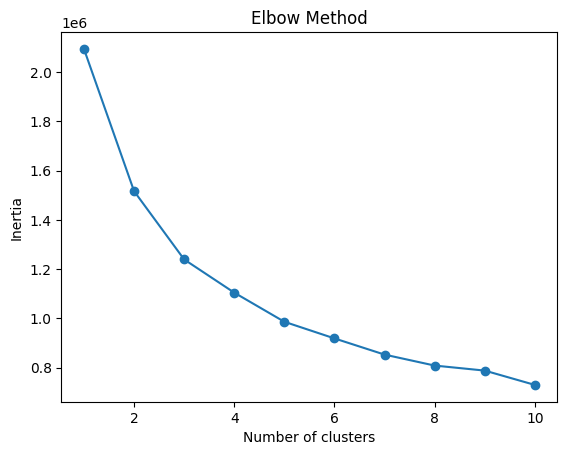

In [10]:
# Elbow method to find best k
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k (e.g., 6 based on elbow)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

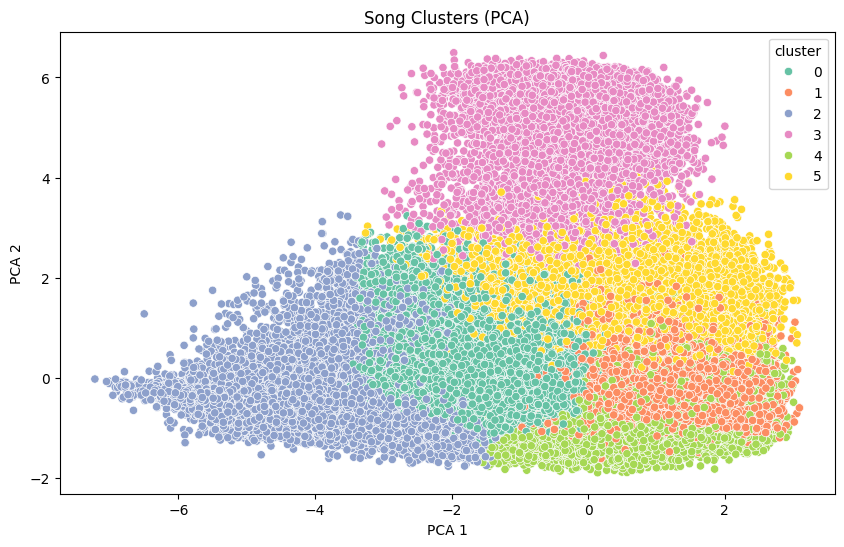

In [16]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add PCA result to DataFrame
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# Plot clusters
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set2')
plt.title('Song Clusters (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [17]:
def recommend_songs(song_name, df, n=5):
    if song_name not in df['track_name'].values:
        return f"'{song_name}' not found in dataset."

    song_cluster = df[df['track_name'] == song_name]['cluster'].values[0]
    cluster_songs = df[df['cluster'] == song_cluster]
    recommendations = cluster_songs[cluster_songs['track_name'] != song_name].sample(n)
    return recommendations[['track_name', 'artist_name', 'cluster']]


In [18]:
print(recommend_songs("Shape of You", df, n=5))  # Replace with a song in your dataset


                                     track_name     artist_name  cluster
186630                             The Long Run   Reel Big Fish        1
139133                             Pobre Diabla        Don Omar        1
229920                               Your Light  Total Giovanni        1
11831                                      DYWM             Nao        1
134814  Rainbow In The Sky (feat. Ijahman Levi)    Alpha Blondy        1


In [20]:
def recommend_songs(song_name, df, n=5):
    if song_name not in df['track_name'].values:
        return f"'{song_name}' not found in dataset."

    song_cluster = df[df['track_name'] == song_name]['cluster'].values[0]
    cluster_songs = df[df['cluster'] == song_cluster]
    recommendations = cluster_songs[cluster_songs['track_name'] != song_name].sample(n)
    return recommendations  # return full rows with pca1, pca2



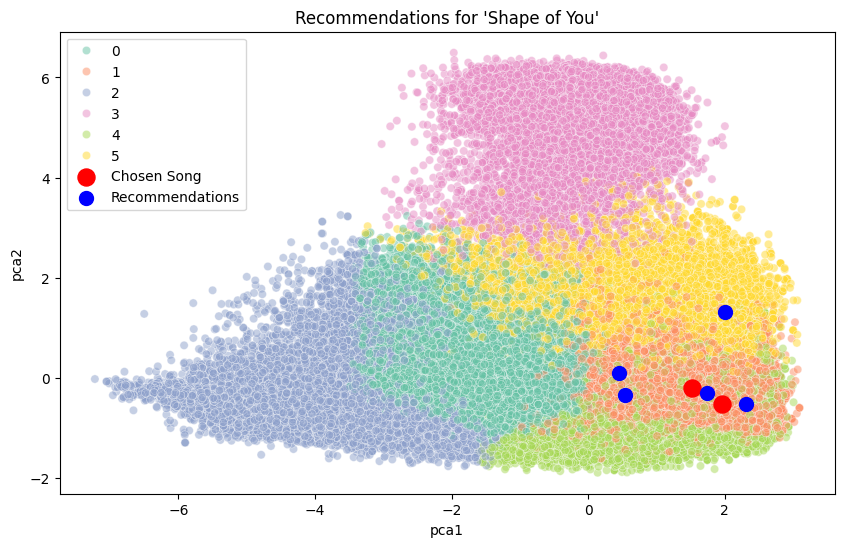

In [21]:
plot_recommendations("Shape of You", df, n=5)
